In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Influencer Attention Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [5]:
num_influencers = 1
num_agents = 10

bounds = [0, 1, 10, 50, 100, 150]
varied_param_values = bounds

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=20,
    consumer_external_interest_prob=0.25,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=bounds,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method='main',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
    delay_sensitivity=None,
    basinhop=False,
)

Optimizing consumer 0


Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.01611883900477551s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.016161901992745697s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.013555661993450485s): nit=3, nfev=10, njev=5.
Optimizing producer 3
Optimization succeeded (overall 0.013414991000900045s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.010808780993102118s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.011115335000795312s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.026366431004134938s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succeeded (overall 0.0139371959

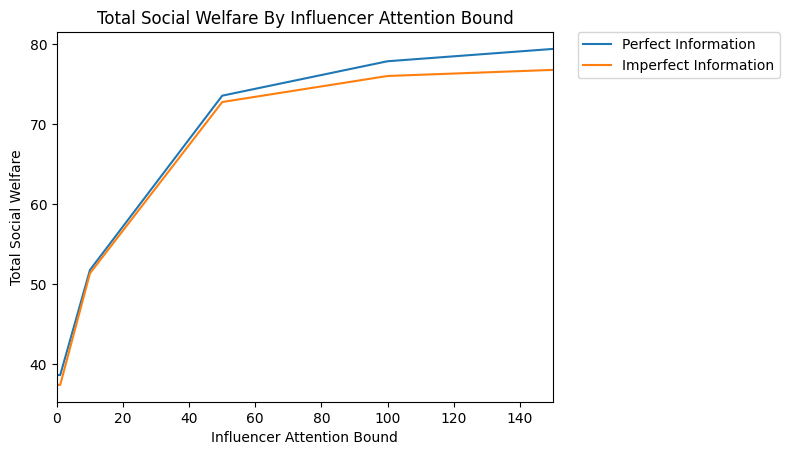

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

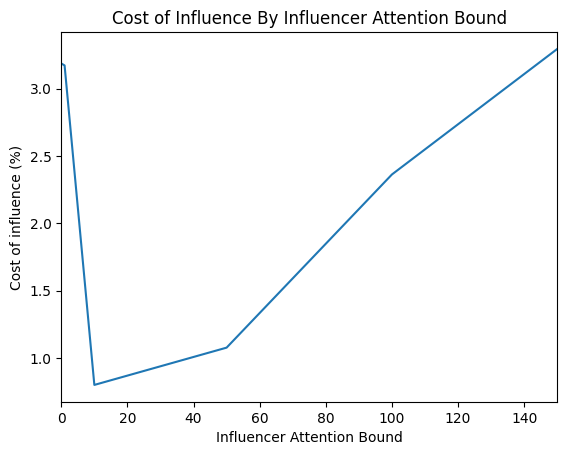

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

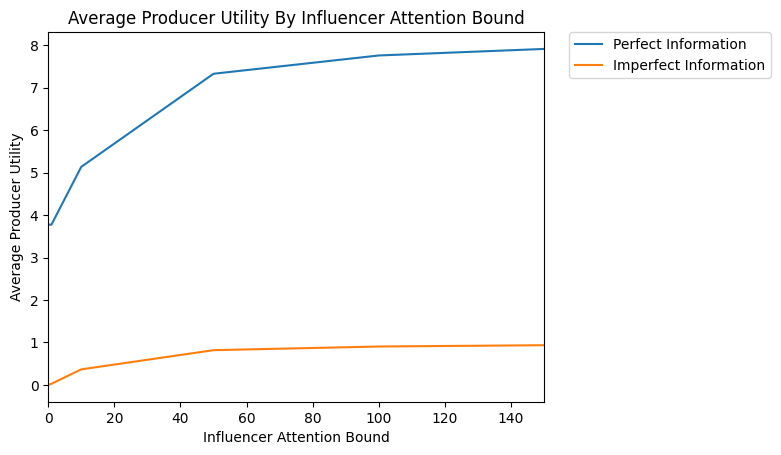

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

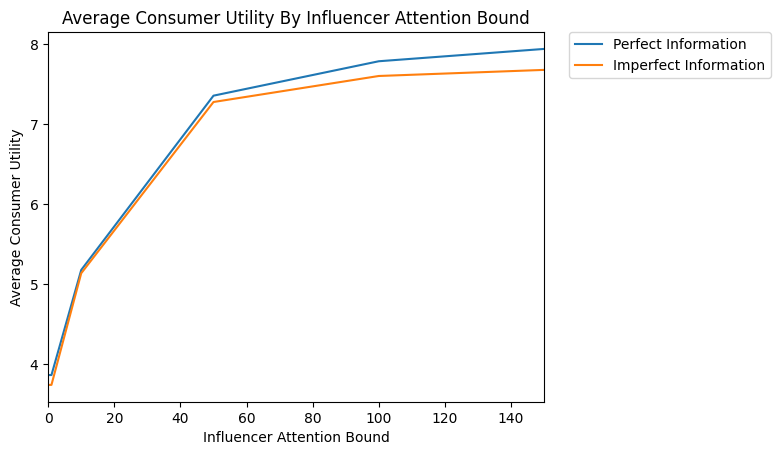

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

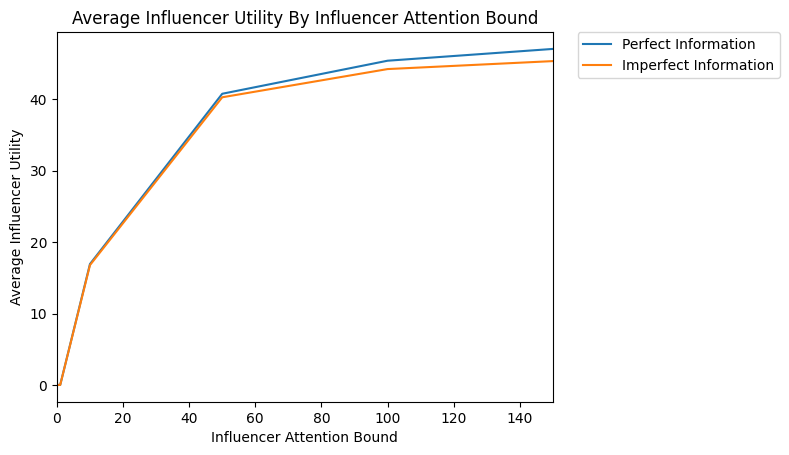

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

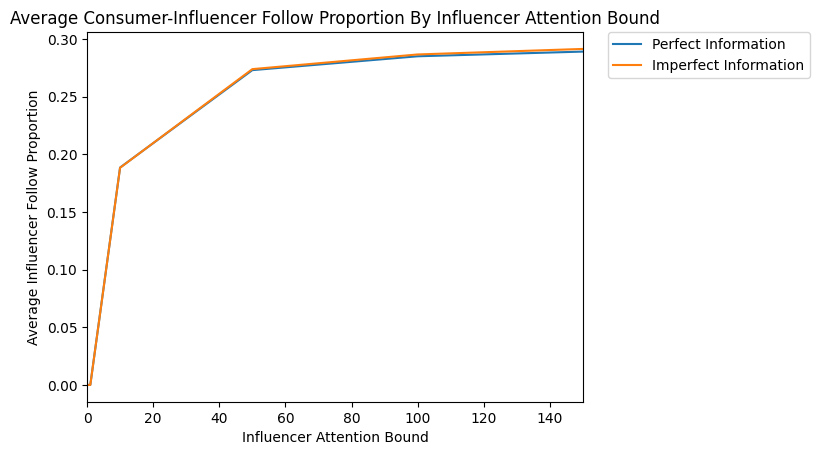

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

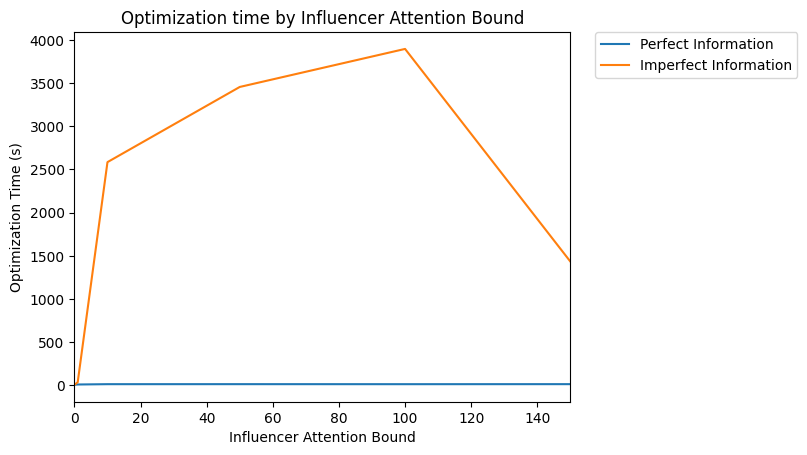

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

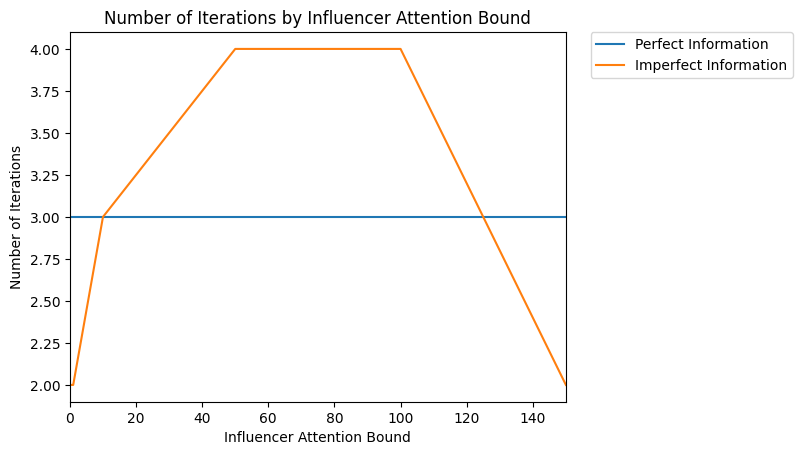

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

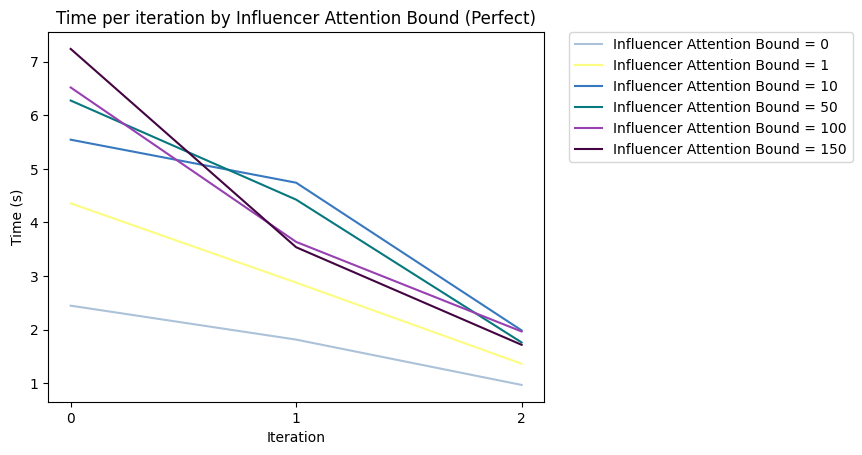

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

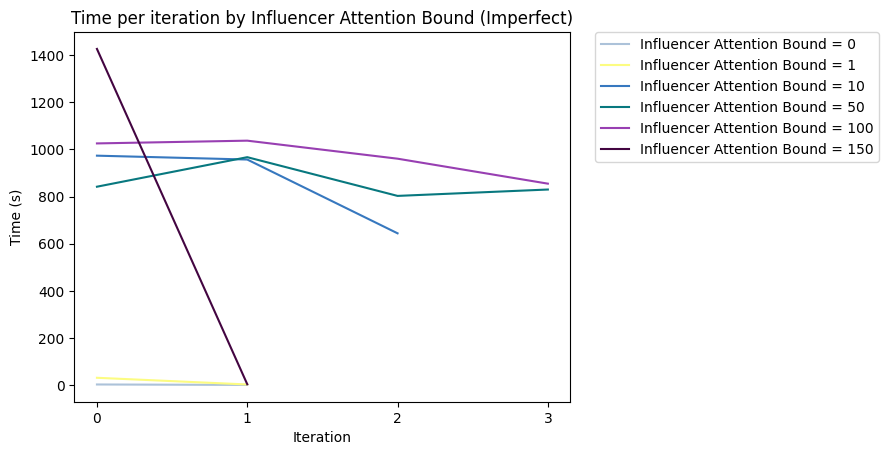

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

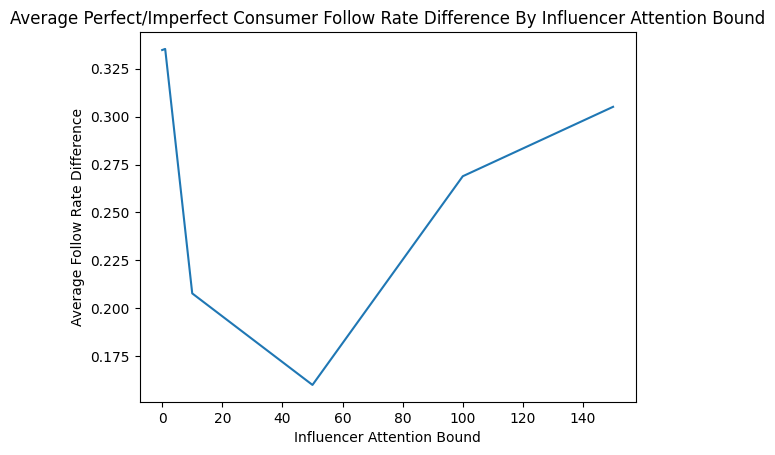

In [37]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

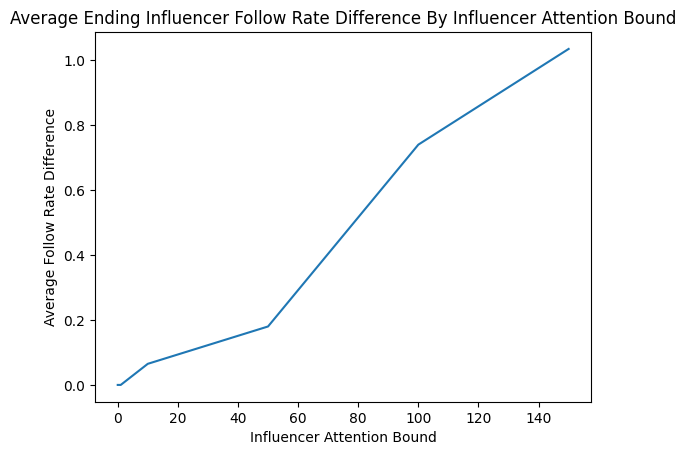

In [38]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

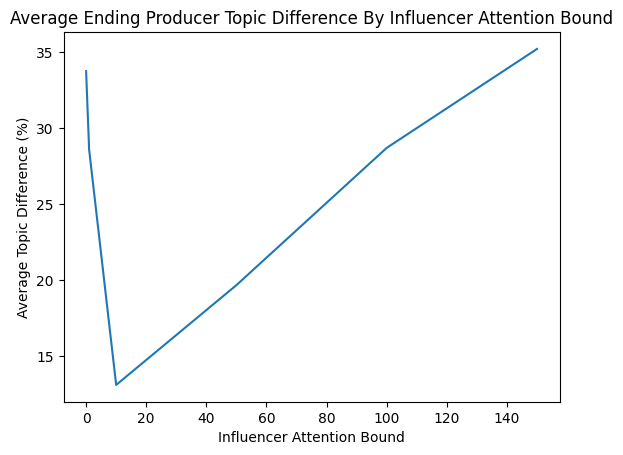

In [19]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
#plt.ylim(0, 10)
plt.show()

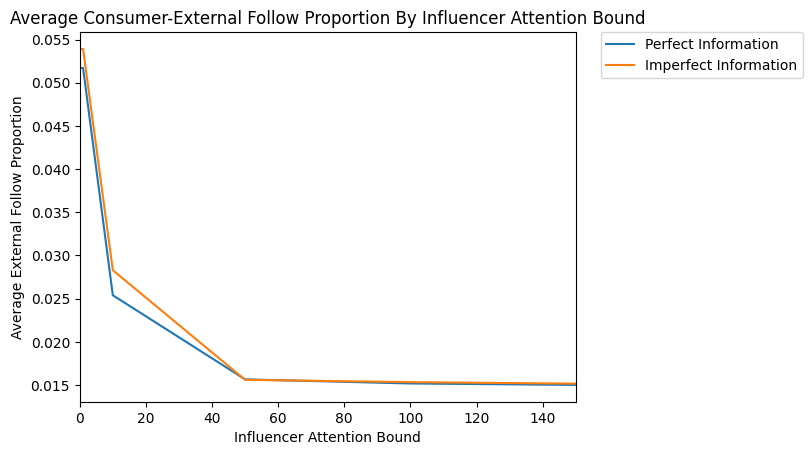

In [20]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

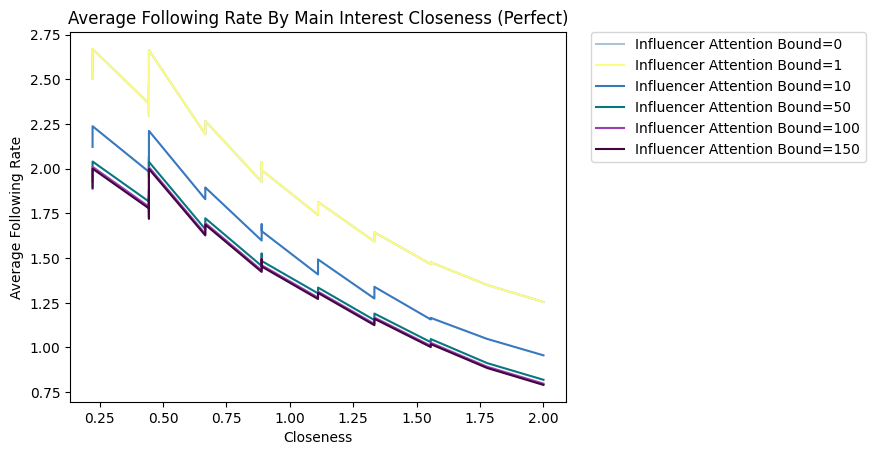

In [21]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

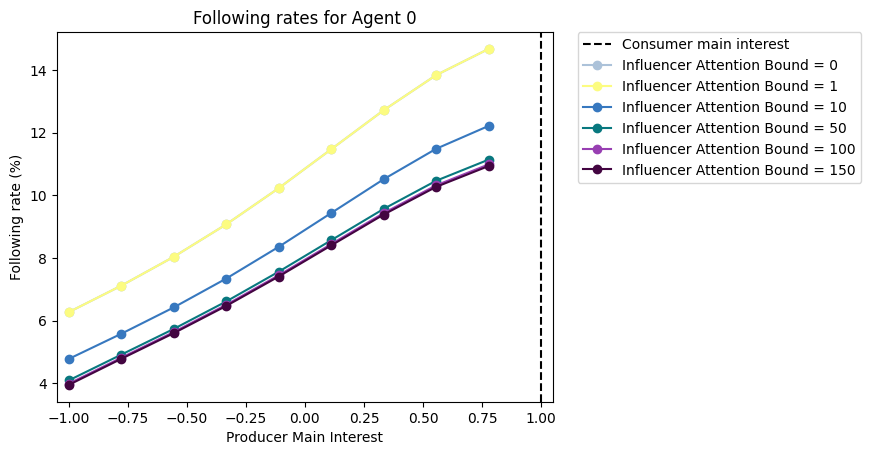

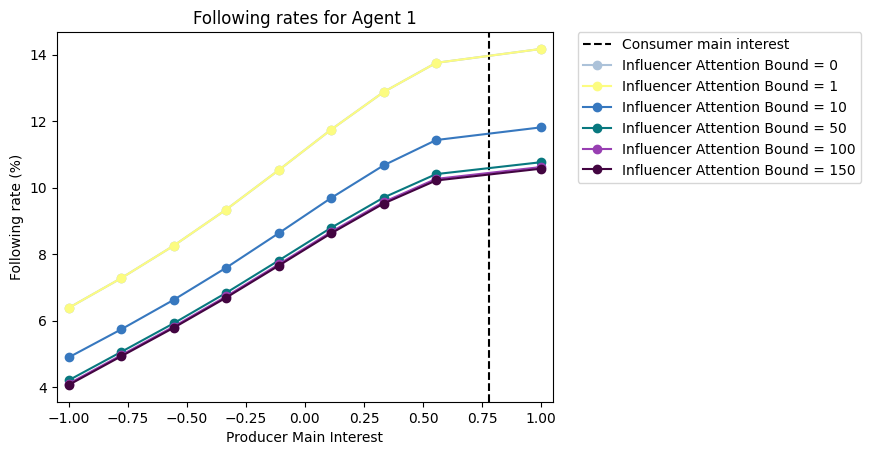

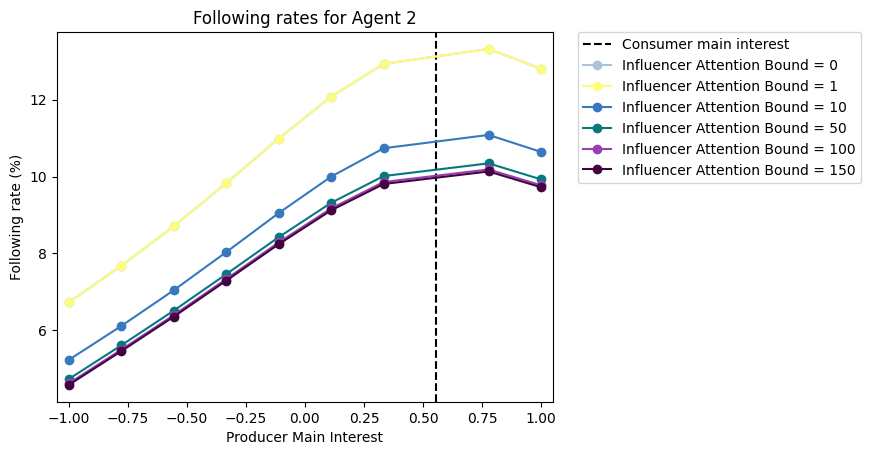

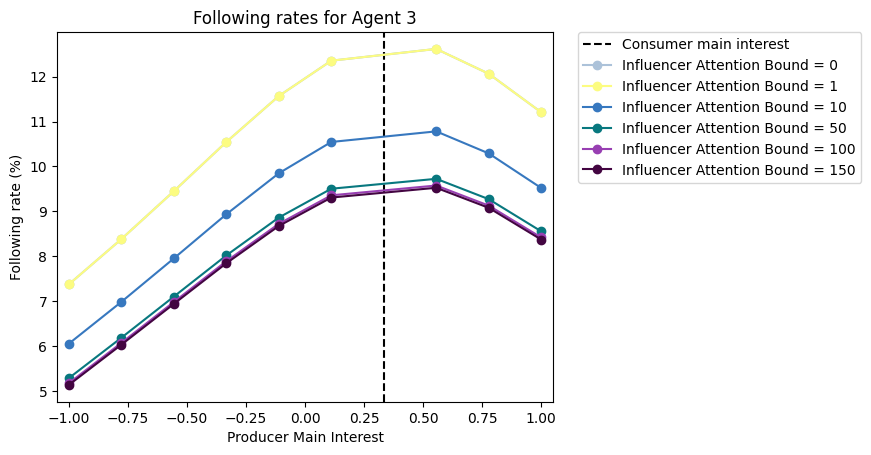

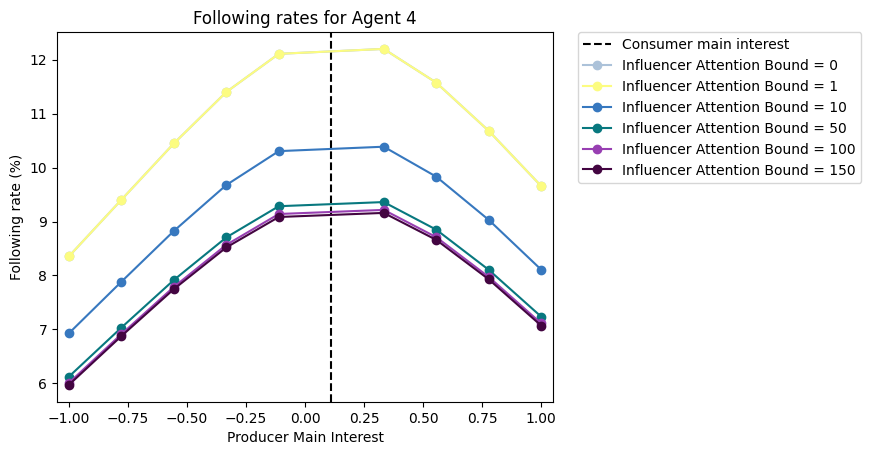

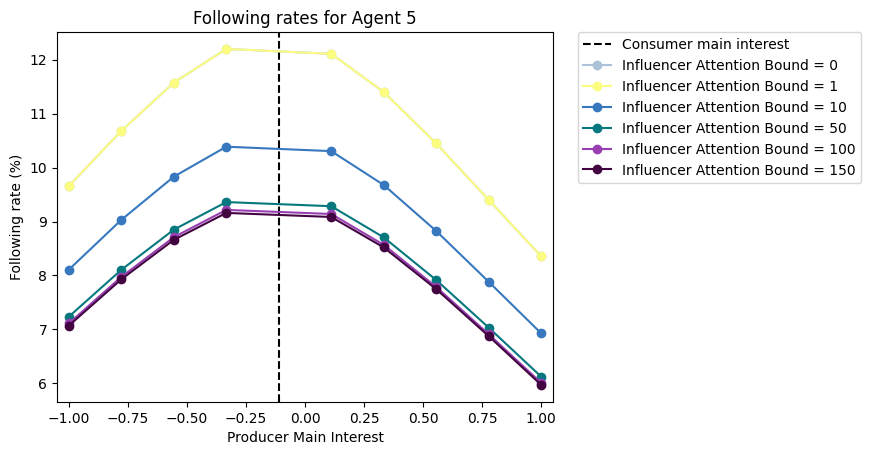

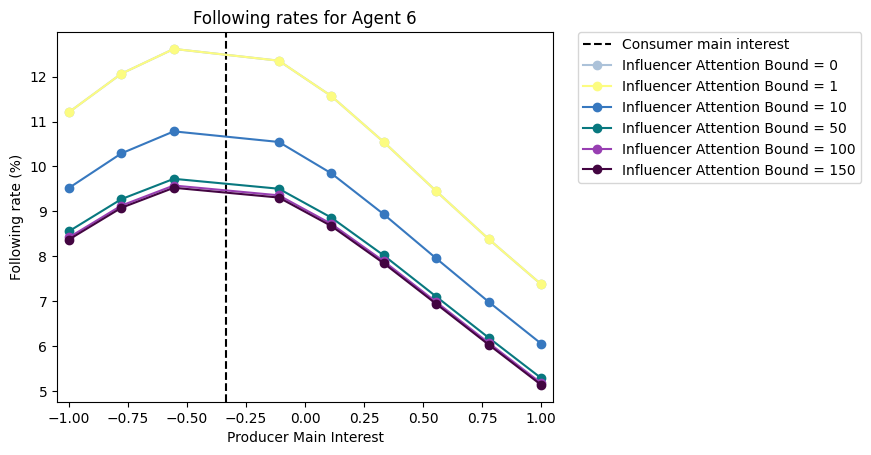

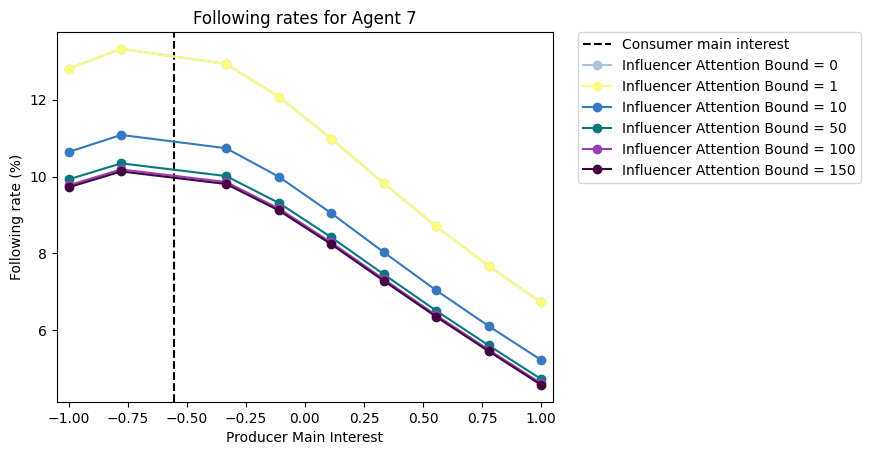

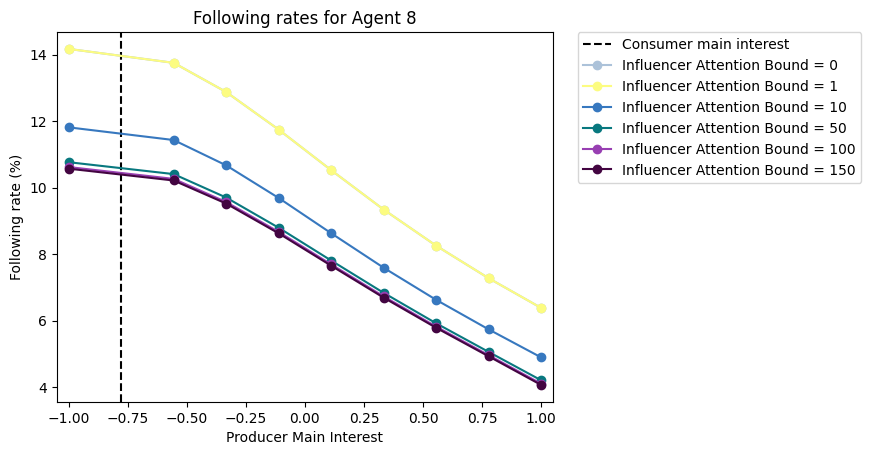

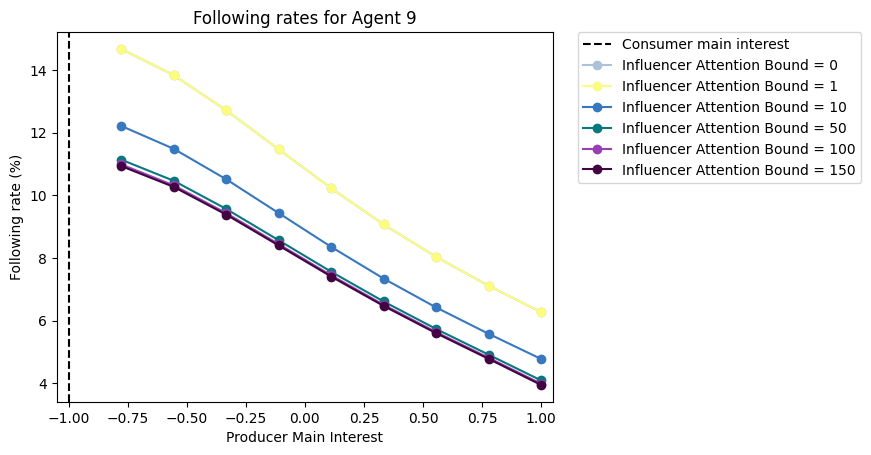

In [22]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

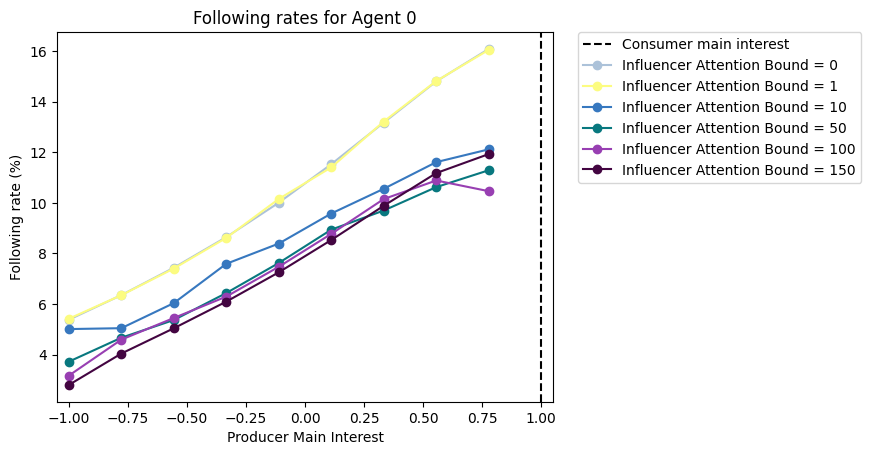

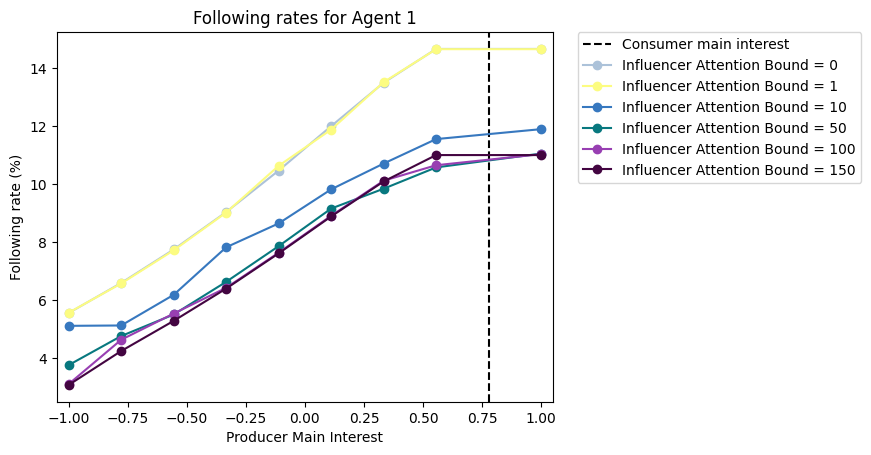

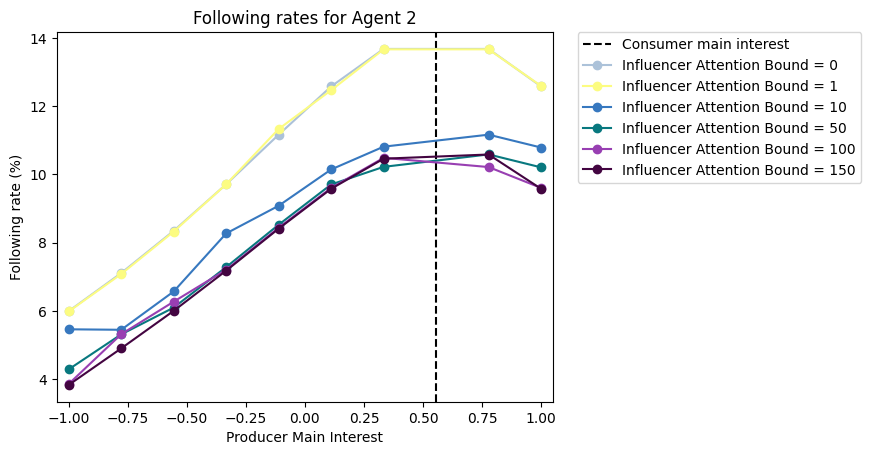

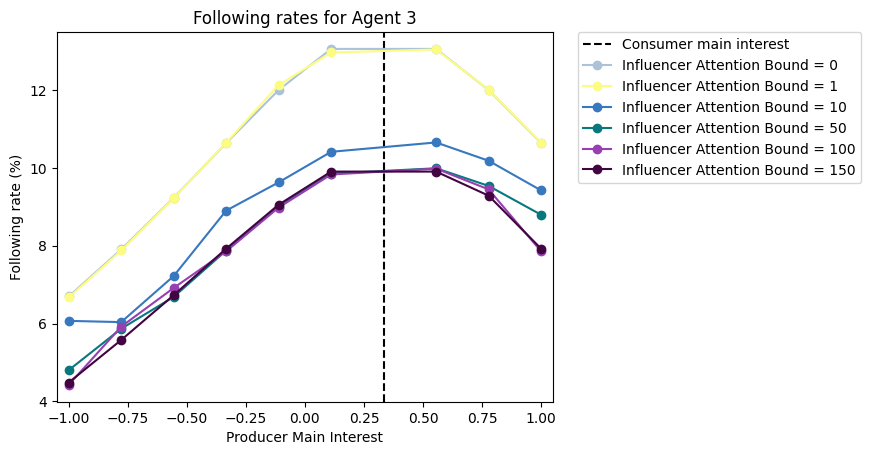

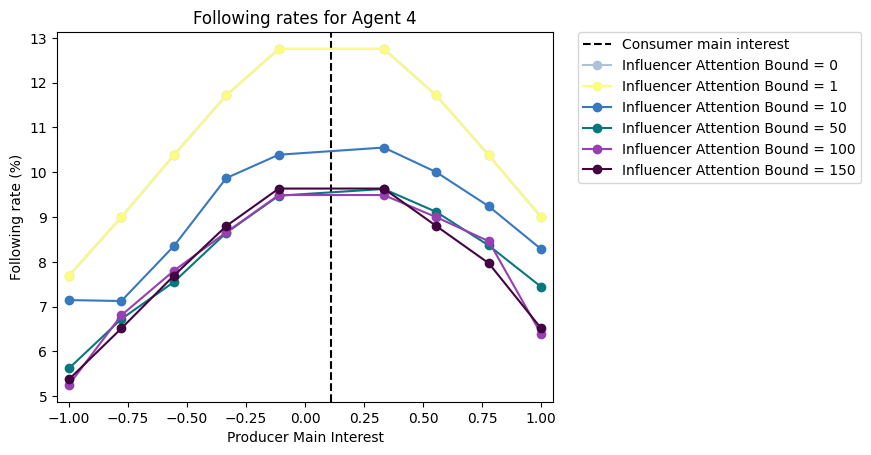

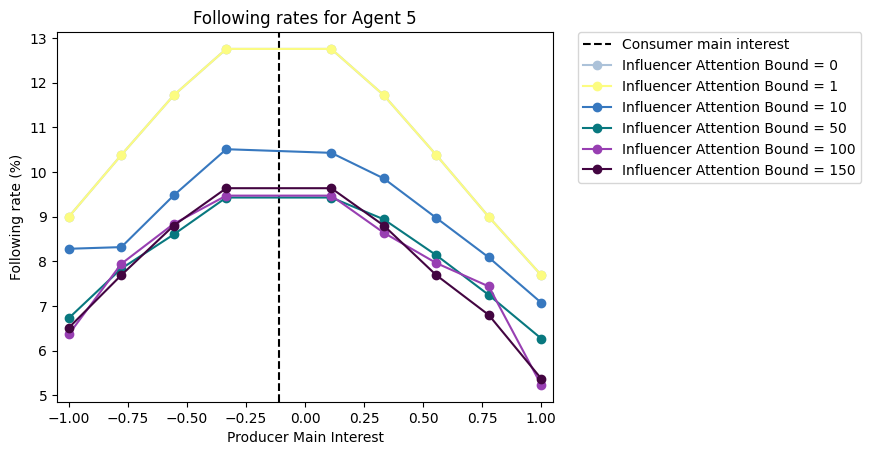

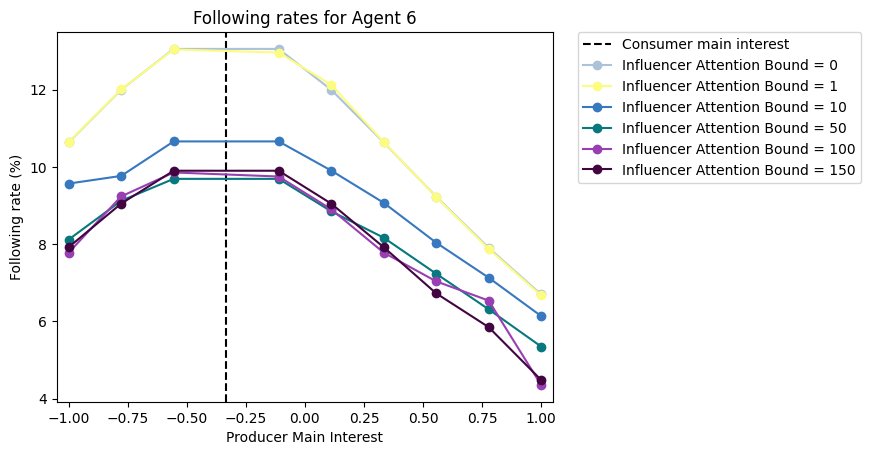

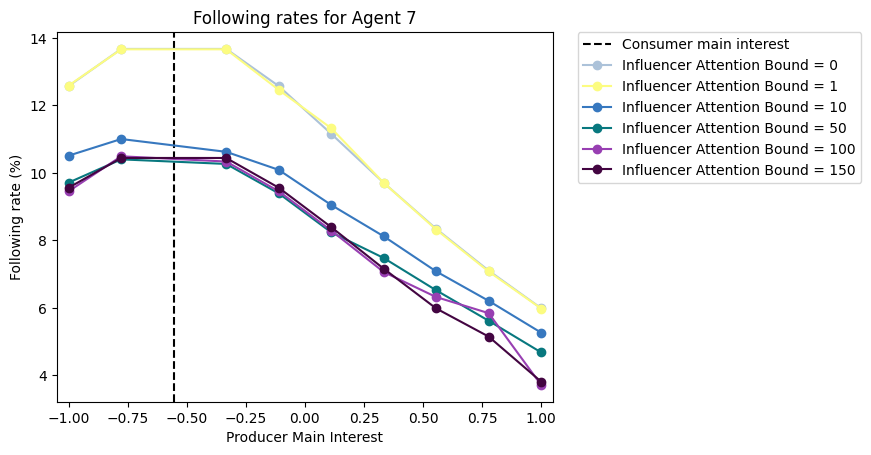

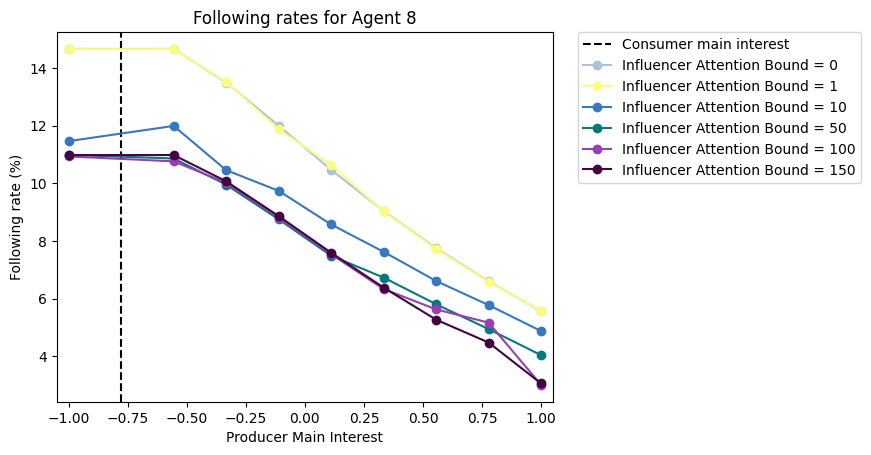

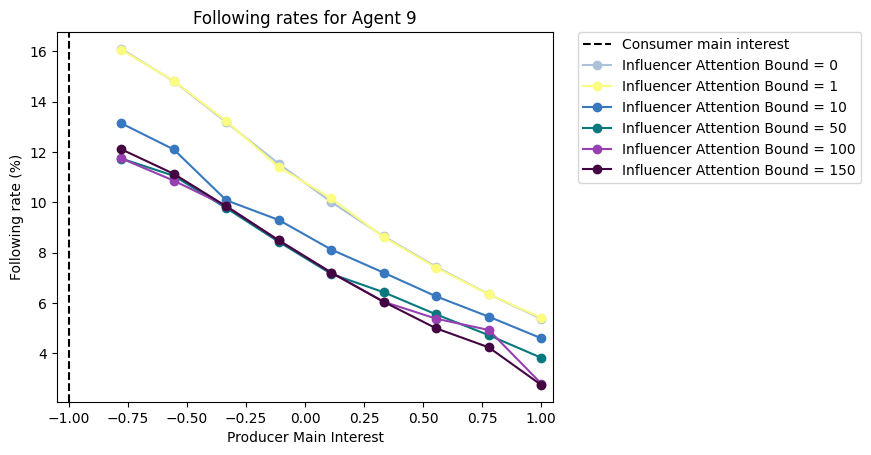

In [23]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

/tmp/ipykernel_2685/2922184412.py:8: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]


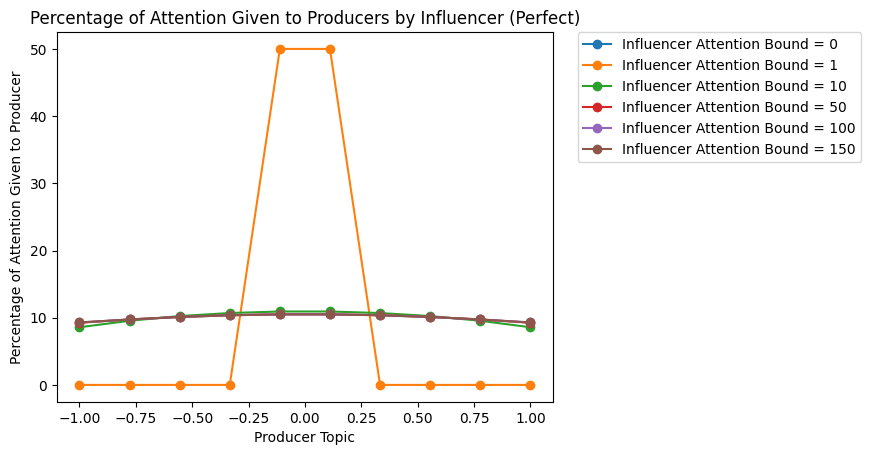

In [24]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.45887190e-11 1.46388727e-11 2.03126405e-12 0.00000000e+00
 5.00000010e-01 4.99999990e-01 0.00000000e+00 2.02420025e-12
 1.45574483e-11 1.45613646e-11 0.00000000e+00 0.00000000e+00]
[0.86828034 0.96406072 1.03401768 1.07977086 1.10168709 1.10081281
 1.07915472 1.00515701 0.8988157  0.86824306 0.         0.        ]
[4.65291652 4.90748287 5.09984816 5.23059974 5.29332701 5.29343089
 5.20324746 5.01717456 4.82117019 4.48080259 0.         0.        ]
[ 8.82769312  9.87666367 10.2488685  10.47337467 10.6459186  10.6459081
 10.47330711 10.20188892  9.77819225  8.82818507  0.          0.        ]
[13.39859176 14.44004837 15.26135633 15.8129969  16.08688289 16.08690069
 15.81302044 15.26129312 14.4403085  13.398601    0.          0.        ]


/tmp/ipykernel_2685/2736067199.py:7: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]


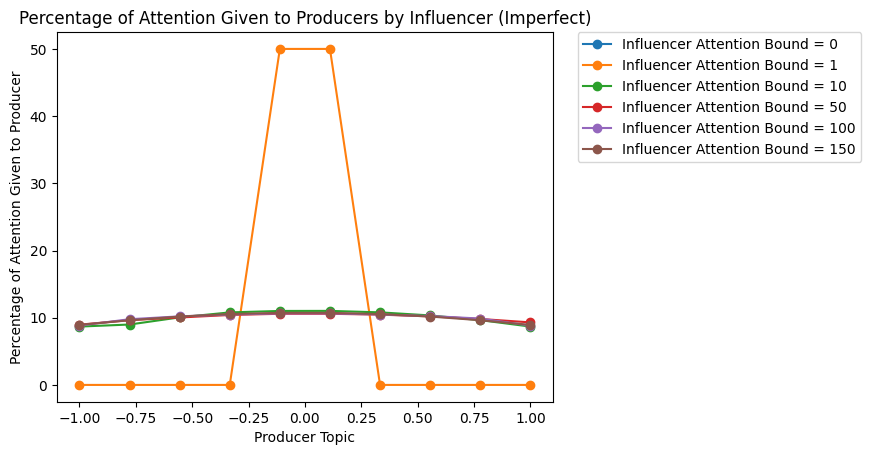

In [25]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [26]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([0.86828034, 0.96406072, 1.03401768, 1.07977086, 1.10168709,
       1.10081281, 1.07915472, 1.00515701, 0.8988157 , 0.86824306,
       0.        , 0.        ])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[1.45887190e-11 1.46388727e-11 2.03126405e-12 0.00000000e+00
 5.00000010e-01 4.99999990e-01 0.00000000e+00 2.02420025e-12
 1.45574483e-11 1.45613646e-11] 0.1999999999884699
[1.45887190e-11 1.46388727e-11 2.03126405e-12 0.00000000e+00
 5.00000010e-01 4.99999990e-01 0.00000000e+00 2.02420025e-12
 1.45574483e-11 1.45613646e-11] 0.1999999999884699
[0.85823322 0.95457327 1.02490241 1.0695576  1.09273324 1.09273298
 1.06955742 1.02490314 0.95457329 0.85823343] 0.08511075432379925
[0.86828034 0.96406072 1.03401768 1.07977086 1.10168709 1.10081281
 1.07915472 1.00515701 0.8988157  0.86824306] 0.0897529936683949
[4.6199705  4.87094599 5.06275029 5.19064972 5.25568252 5.25567763
 5.19065115 5.06275211 4.87094853 4.61997156] 0.23096936217536101
[4.65291652 4.90748287 5.09984816 5.23059974 5.29332701 5.29343089
 5.20324746 5.01717456 4.82117019 4.48080259] 0.26598218482165964
[ 9.29133286  9.73797123 10.10503548 10.36603965 10

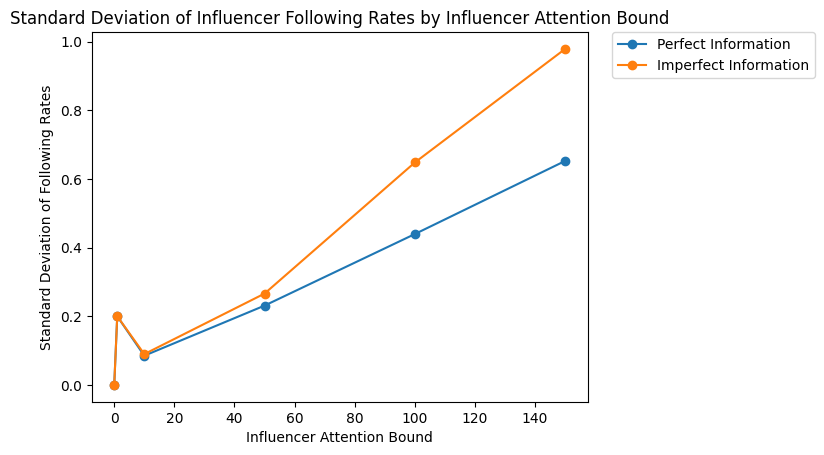

In [27]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/tmp/ipykernel_2685/4106857289.py:8: RuntimeWarning: invalid value encountered in scalar divide
  following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]


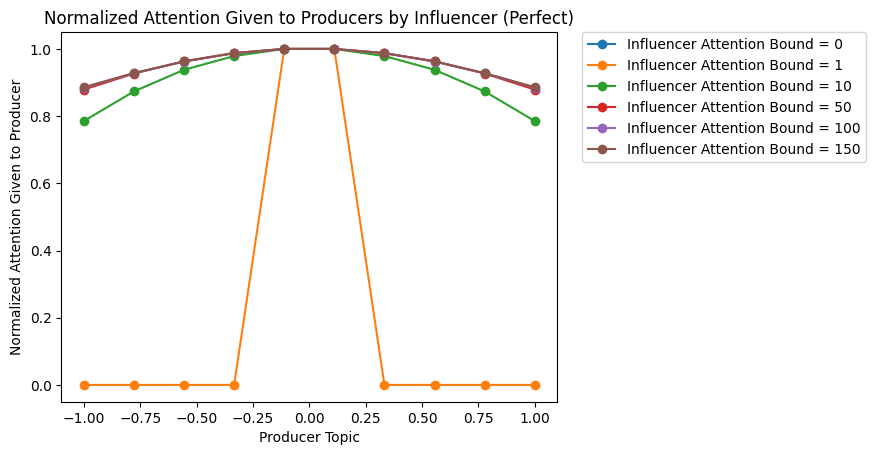

In [28]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/tmp/ipykernel_2685/2908125049.py:8: RuntimeWarning: invalid value encountered in scalar divide
  following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]


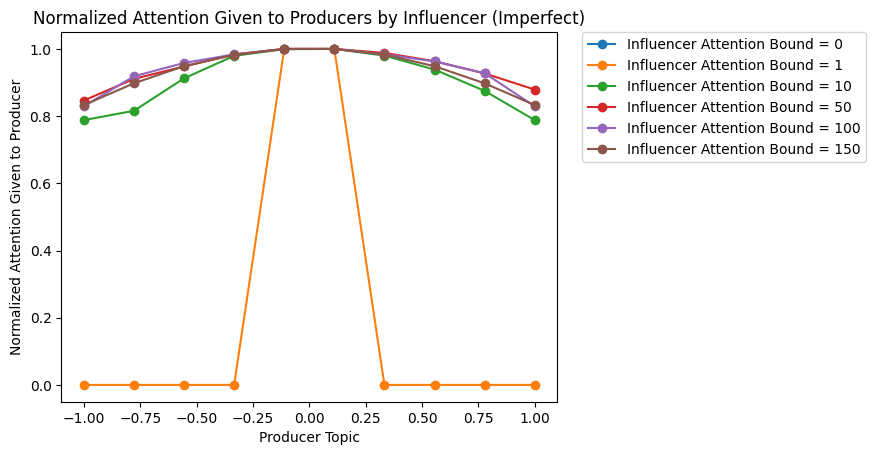

In [29]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

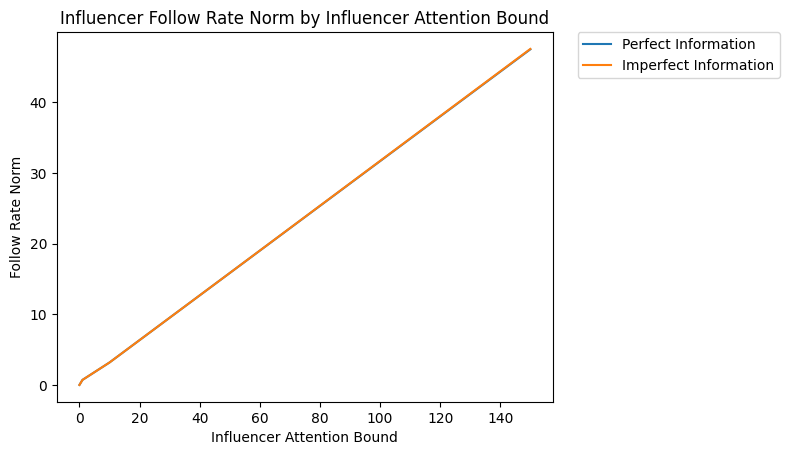

In [30]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/tmp/ipykernel_2685/3048140435.py:11: RuntimeWarning: invalid value encountered in scalar divide
  avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100


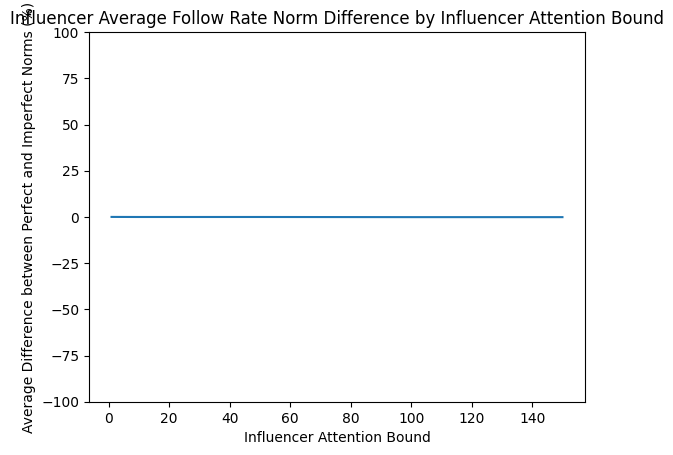

In [31]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

/tmp/ipykernel_2685/1620078180.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
/tmp/ipykernel_2685/1620078180.py:9: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))


nan
1.0
0.999790934532889
0.9999355864211327
0.9997283241128617
0.9997640556906559


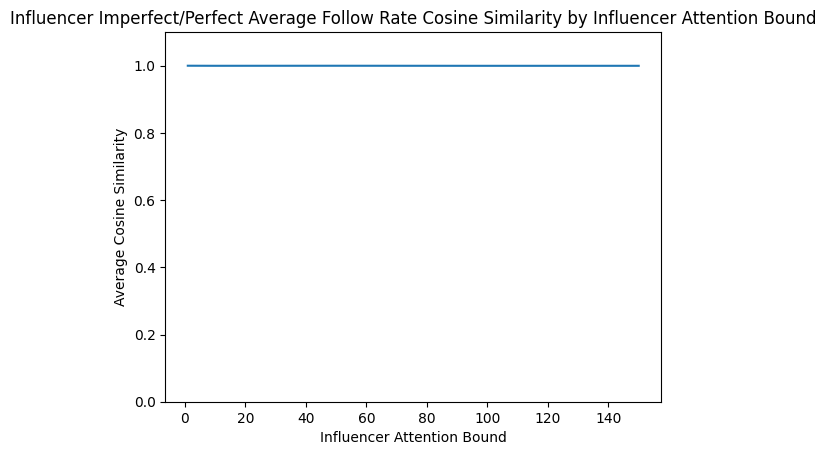

In [32]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

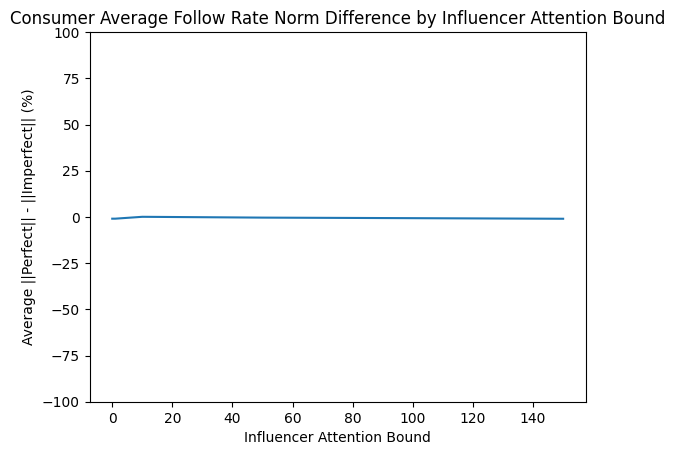

In [33]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

[0.9987291488577024, 0.9987264605171274, 0.9992911950146167, 0.9997596544947551, 0.9993727108735385, 0.9991925047692227]


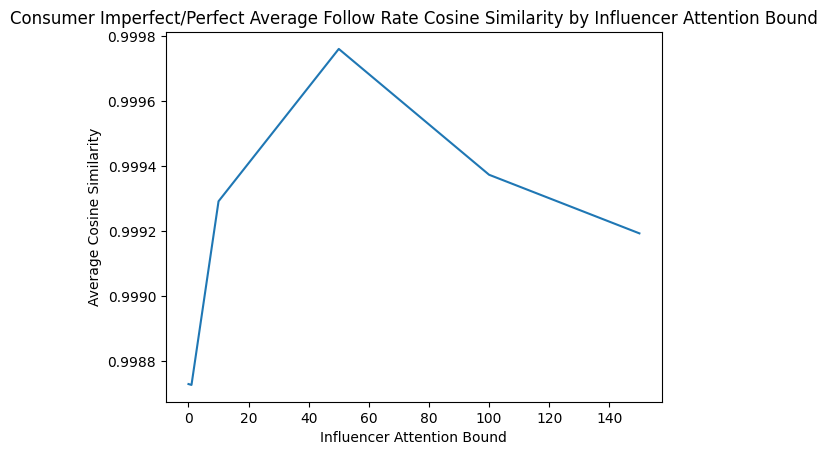

In [34]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [35]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 38.620164347731105, 38.68020117038033, 38.6820446892305], 'total_producer_utility': [0, 37.64017269471654, 37.74383658940922, 37.744744205442316], 'total_influencer_utility': [0, 0, 0, 0], 'total_social_welfare': [0, 38.620164347731105, 38.68020117038033, 38.6820446892305], 'average_consumer_rate_change': [0, 2.70182279641609, 0.3810744529466086, 0.05357223261625645], 'average_producer_topic_change': [0, 0.16467717805939847, 0.021845128825879693, 0.005039692526900813], 'average_influencer_rate_change': [0, 0.0, 0.0, 0.0], 'average_consumer_utility_change': [0, 3.8620164347731096, 0.0060036822649223165, 0.0001843518850172643], 'average_producer_utility_change': [0, 3.764017269471654, 0.010366389469268312, 9.076160331011884e-05], 'average_influencer_utility_change': [0, 0.0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 2.875648519131323, 2.9176812877891356, 2.909556603877803], 'utility_change': [0, 2.875648519131323, 0.04203276865

In [36]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 37.448871239986055, 37.448871239986055], 'total_producer_utility': [0, 0, 0], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 37.448871239986055, 37.448871239986055], 'average_consumer_rate_change': [0, 2.70182279641609, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 3.7448871239986055, 0.0], 'average_producer_utility_change': [0, 0.0, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 3.0578447185846134, 3.0578447185846134], 'utility_change': [0, 3.0578447185846134, 0.0], 'optimization_times': [0.19093966099899262, 0.02628047099278774], 'agent': {'following_rates': {0: 0.0, 1: 3.2179236813980885, 2: 2.961475420509627, 3: 2.635516724682103, 4: 2.3060990556509764, 5: 2.002013221937269, 6: 1.7296528912086124, 7: 1.4872119471823966, 8: 1.2707907842310675, 9: 1.0759070367398231, 1